# SIT742: Modern Data Science 
**(Week 03A: Data Wrangling)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)

Prepared by **SIT742 Teaching Team**

---

# Session 03A - DataWrangling with Pandas 

## Table of Content

* Part 1. Scraping data from the web
* Part 2. States and Territories of Australia

---

## Part 1. Scraping data from the web

Many of you will probably be interested in scraping data from the web for your projects. For example, what if we were interested in working with some historical Canadian weather data? Well, we can get that from: http://climate.weather.gc.ca using their API. Requests are going to be formatted like this:


In [49]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

Note that we've requested the data be returned as a csv, and that we're going to supply the month and year as inputs when we fire off the query. To get the data for March 2012, we need to format it with month=3, year=2012:


In [51]:
url = url_template.format(month=3, year=2012)
url

'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year=2012&Month=3&timeframe=1&submit=Download+Data'

This is great! We can just use the same read_csv function as before, and just give it a URL as a filename. Awesome.

Upon inspection, we find out that there are 16 rows of metadata at the top of this CSV, but pandas knows CSVs are weird, so there's a skiprows options. We parse the dates again, and set 'Date/Time' to be the index column. Here's the resulting dataframe.

In [52]:
weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1')

In [53]:
weather_mar2012.head()

,Year,Month,Day,Time,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,-5.5,NaN,-9.7,NaN,72,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,-5.7,NaN,-8.7,NaN,79,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,-5.4,NaN,-8.3,NaN,80,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,-4.7,NaN,-7.7,NaN,79,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,-5.4,NaN,-7.8,NaN,83,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


As before, we can get rid of any comlumns that don't contain real data using ${\tt .dropna()}$

In [54]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')

In [55]:
weather_mar2012.head()

,Year,Month,Day,Time,Temp (Â°C),Dew Point Temp (Â°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Getting better! The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

In [56]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time'], axis=1)
weather_mar2012[:5]

,Temp (Â°C),Dew Point Temp (Â°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Great! Now let's figure out how to download the whole year? It would be nice if we could just send that as a single request, but like many APIs this one is limited to prevent people from hogging bandwidth. No problem: we can write a function!

In [57]:
def download_weather_month(year, month):
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time'], axis=1)
    return weather_data

Now to test that this function does the right thing:

In [58]:
download_weather_month(2012, 1).head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Woohoo! Now we can iteratively request all the months using a single line. This will take a little while to run.

In [59]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 12)]

Once that's done, it's easy to concatenate all the dataframes together into one big dataframe using ${\tt pandas.concat()}$. And now we have the whole year's data!

In [60]:
weather_2012 = pd.concat(data_by_month)

This thing is long, so instead of printing out the whole thing, I'm just going to print a quick summary of the ${\tt DataFrame}$ by calling ${\tt .info()}$:

In [61]:
weather_2012.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8040 entries, 2012-01-01 00:00:00 to 2012-11-30 23:00:00
Data columns (total 7 columns):
Temp (C)              8040 non-null float64
Dew Point Temp (C)    8040 non-null float64
Rel Hum (%)           8040 non-null int64
Wind Spd (km/h)       8040 non-null int64
Visibility (km)       8040 non-null float64
Stn Press (kPa)       8040 non-null float64
Weather               8040 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 502.5+ KB


And a quick reminder, if we wanted to save that data to a file:

In [62]:
weather_2012.to_csv('weather_2012.csv')

In [63]:
!ls

ozone (1).csv  ozone.csv  weather_2012.csv


And finally, something you should do early on in the wrangling process, plot data:

In [64]:
# plot that data
import matplotlib.pyplot as plt 
# so now 'plt' means matplotlib.pyplot

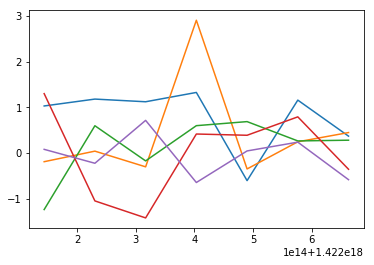

In [65]:
plt.plot(df)

In [66]:
# nothing to see... in iPython you need to specify where the chart will display, usually it's in a new window
# to see them 'inline' use:
%matplotlib inline

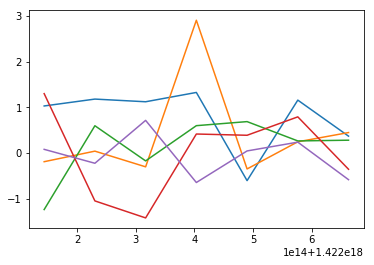

In [67]:
plt.plot(df)

In [ ]:
# that's better, try other plots, scatter is popular, also boxplot

## Part 2. States and Territories of Australia 

We are interested in getting  State and Territory information from Wikipedia, however we do not want to copy and paste the table : )

Here is the URL
https://en.wikipedia.org/wiki/States_and_territories_of_Australia   

We need two libraries to do the task:

Check documentations here:
* [urllib](https://docs.python.org/2/library/urllib.html)
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


In [68]:
import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen
from bs4 import BeautifulSoup

We first save the link in wiki

In [69]:
wiki = "https://en.wikipedia.org/wiki/States_and_territories_of_Australia"

Then use ulropen to open the page. 

If you get "SSL: CERTIFICATE_VERIFY_FAILED", what you need to do is find where "Install Certificates.command" file is, and click it to upgrade the certificate. Then, you should be able to solve the problem.

In [70]:
page = urlopen(wiki)

In [71]:
if sys.version_info[0] == 3:
    page = page.read()

You will meet BeautifulSoup later in this subject, so don't worry if you feel uncomfortable with it now. You can always revisit. 

We begin by reading in the source code and creating a Beautiful Soup object with the BeautifulSoup function.

In [77]:
soup = BeautifulSoup(page, "lxml")

Then we print and see. 

In [78]:
 print (soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   States and territories of Australia - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"States_and_territories_of_Australia","wgTitle":"States and territories of Australia","wgCurRevisionId":885466096,"wgRevisionId":885466096,"wgArticleId":4689096,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Australian Statistical Geography Standard 2016 ID not in Wikidata","Australian Statistical Geography Standard 2011 ID not in Wikidata","Articles with short description","Use dmy dates from October 2018","Use Australian English from Oc

For who do not know much about HTML, this might be a bit overwhelming, but essentially it contains lots of tags in the angled brackets providing structural and formatting information that we don't care so much here. What we need is the table. 

Let's first check the title.

In [79]:
soup.title.string

'States and territories of Australia - Wikipedia'

It looks fine, then we would like to find the table. 

Let's have a try to extract all contents within the 'table' tag.

In [80]:
all_tables = soup.findAll('table')
print(all_tables)

[<table class="infobox" style="width:22em"><tbody><tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold">Australian states and territories</th></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Map_of_Australia.png"><img alt="Map of Australia.png" data-file-height="352" data-file-width="328" decoding="async" height="236" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Map_of_Australia.png/220px-Map_of_Australia.png" srcset="//upload.wikimedia.org/wikipedia/commons/e/e0/Map_of_Australia.png 1.5x" width="220"/></a></td></tr><tr><th scope="row">Category</th><td><a class="mw-redirect" href="/wiki/Federated_states" title="Federated states">States</a> (6)<br/><a href="/wiki/Federal_territory" title="Federal territory">Internal territories</a> (3)<br/><a href="/wiki/Territory#Overseas_territory" title="Territory">External territories</a> (7)</td></tr><tr><th scope="row">Location</th><td><a href="/wiki/Australia" title="Australi

This returns a collection of tag objects. It seems that most of the information are useless and it's getting hard to hunt for the table. So searched online and found an instruction here: 

https://adesquared.wordpress.com/2013/06/16/using-python-beautifulsoup-to-scrape-a-wikipedia-table/

The class is "wikitable sortable"!! Have a try then.   

In [81]:
right_table=soup.find('table', class_='wikitable sortable')
print (right_table)

<table class="wikitable sortable" style="width:950px;text-align:center">
<caption style="text-align:center;background:#BFD7FF">States and territories of Australia<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[n 1]</a></sup>
</caption>
<tbody><tr>
<th class="unsortable"><a href="/wiki/List_of_Australian_flags#States_and_territories" title="List of Australian flags">Flag</a>
</th>
<th>State/territory name
</th>
<th>Abbrev
</th>
<th><a href="/wiki/ISO_3166-2:AU" title="ISO 3166-2:AU">ISO</a><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[2]</a></sup>
</th>
<th>Postal
</th>
<th>Type
</th>
<th><a href="/wiki/List_of_Australian_capital_cities" title="List of Australian capital cities">Capital</a><br/>(or largest settlement)
</th>
<th>Population<sup class="reference" id="cite_ref-ABSQPOP_4-0"><a href="#cite_note-ABSQPOP-4">[3]</a></sup><sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[4]</a></sup>
</th>
<th>Area (km²)<sup class="reference" id="cite_

Next we need to extract table header row by find the first 'tr'>

In [82]:
head_row = right_table.find('tr')
print (head_row)

<tr>
<th class="unsortable"><a href="/wiki/List_of_Australian_flags#States_and_territories" title="List of Australian flags">Flag</a>
</th>
<th>State/territory name
</th>
<th>Abbrev
</th>
<th><a href="/wiki/ISO_3166-2:AU" title="ISO 3166-2:AU">ISO</a><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[2]</a></sup>
</th>
<th>Postal
</th>
<th>Type
</th>
<th><a href="/wiki/List_of_Australian_capital_cities" title="List of Australian capital cities">Capital</a><br/>(or largest settlement)
</th>
<th>Population<sup class="reference" id="cite_ref-ABSQPOP_4-0"><a href="#cite_note-ABSQPOP-4">[3]</a></sup><sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[4]</a></sup>
</th>
<th>Area (km²)<sup class="reference" id="cite_ref-GAarea_6-0"><a href="#cite_note-GAarea-6">[5]</a></sup>
</th></tr>


Then we extract header row name via iterate through each row and extract text. 

The .findAll function in Python returns a list containing all the elements, which you can iterate through.

In [83]:
header_list = []
headers = head_row.findAll('th')
for header in headers:
    #print header.find(text = True)
    header_list.append(header.find(text = True))
header_list

['Flag',
 'State/territory name\n',
 'Abbrev\n',
 'ISO',
 'Postal\n',
 'Type\n',
 'Capital',
 'Population',
 'Area (km²)']

We can probably iterate trough this list and then extract contents. But let's take a simple approach of extracting each column separately. 

In [84]:
flag=[]
state=[]
abbrev = []
ISO = []
Postal =[]
Type = []
Capital = []
population = []
Area = []
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) > 0 and len(cells) == 9:
        flag.append(cells[0].find(text=True))
        state.append(cells[1].find(text=True))
        abbrev.append(cells[2].find(text=True))
        ISO.append(cells[3].find(text=True))
        Postal.append(cells[4].find(text=True))
        Type.append(cells[5].find(text=True))
        Capital.append(cells[6].find(text=True))
        population.append(cells[7].find(text=True))
        Area.append(cells[8].find(text=True))

Next we can append all list to the dataframe.

In [85]:
df_au = pd.DataFrame()
df_au[header_list[0]] = flag
df_au[header_list[1]] = state
df_au[header_list[2]]=abbrev
df_au[header_list[3]]=ISO
df_au[header_list[4]]=Postal
df_au[header_list[5]]=Type
df_au[header_list[6]]=Capital
df_au[header_list[7]]=population
df_au[header_list[8]]=Area

Done !

In [86]:
df_au

,Flag,State/territory name,Abbrev,ISO,Postal,Type,Capital,Population,Area (km²)
0,None,New South Wales,NSW,AU-NSW,NSW,State,Sydney,7006795590000000000♠,"800,628"
1,None,Queensland,Qld,AU-QLD,QLD,State,Brisbane,7006482700000000000♠,"1,723,936"
2,None,South Australia,SA,AU-SA,SA,State,Adelaide,7006170650000000000♠,"978,810"
3,None,Tasmania,Tas,AU-TAS,TAS,State,Hobart,7005518500000000000♠,"64,519"
4,None,Victoria,Vic,AU-VIC,VIC,State,Melbourne,7006643000000000000♠,"227,010"
5,None,Western Australia,WA,AU-WA,WA,State,Perth,7006261370000000000♠,"2,526,786"
6,None,Australian Capital Territory,ACT,AU-ACT,ACT,Territory,Canberra,7005397397000000000♠,"2,280"
7,[n 3],Jervis Bay Territory,JBT,None,JBT,Territory,(,7002391000000000000♠,72
8,None,Northern Territory,NT,AU-NT,NT,Territory,Darwin,7005244000000000000♠,"1,335,742"
9,[n 3],Ashmore and Cartier Islands,None,None,None,External,(Offshore,5000000000000000000♠,199
